<a href="https://colab.research.google.com/github/mori-assereto/DataAlchemy/blob/main/NY_Taxi_Tipping_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Acquisition**

## DataFrame Second Half

In [ ]:
#Taking into account that it is not necessary to have records for the whole year for the proposed analysis and that almost all of the tips recorded come from trips paid for with credit cards, we decided to use records from the second half of the year in which the type of payment is TC,
#is that we defined to use records from the second half of the year in which the type of payment is TC.

# df = pd.DataFrame()

# for mes in range(7,13):
#   print(f'Cargando el siguiente Dataset: https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-{mes:02}.csv')
#   df_mes = pd.read_csv(f'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-{mes:02}.csv', usecols=range(0,17))
#   df_mes = df_mes[df_mes['payment_type']==1]
#   df_sample = df_mes.sample(200000, random_state=1)
#   df = pd.concat([df, df_sample])

# df.to_csv("/content/gdrive/My Drive/taxis_H2.csv", index=False)


In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1fPwdyZrPFjfh-6-1ONNRp02XRRUkah5e/view?usp=sharing'

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('taxis_H2.csv')

df = pd.read_csv('taxis_H2.csv')

The above part of PyDrive is intended to allow us to use any file in our shared folder without the need for us all to have the same name or path by using the sharelink of the files.

In [ ]:
# drive.mount("/content/gdrive", force_remount=True)
# location = "/content/gdrive/My Drive/taxis_H2.csv"
# df = pd.read_csv(location, low_memory = False)

In [ ]:
# Size of the original Data Frame
df.shape

(1200000, 17)

In [ ]:
# Total number of records
df.payment_type.value_counts()

1    1200000
Name: payment_type, dtype: int64

In [ ]:
# Data Frame preview
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-07-28 12:30:38,2016-07-28 13:19:22,2,7.04,1,N,141,70,1,34.0,0.0,0.5,6.96,0.00,0.3,41.76
1,2,2016-07-28 11:41:53,2016-07-28 12:07:58,1,9.52,1,N,164,138,1,29.5,0.0,0.5,7.17,5.54,0.3,43.01
2,1,2016-07-03 19:45:44,2016-07-03 20:00:33,2,4.00,1,N,161,79,1,15.0,0.5,0.5,2.00,0.00,0.3,18.30
3,1,2016-07-08 19:42:03,2016-07-08 19:50:45,1,1.80,1,N,249,231,1,8.5,1.0,0.5,2.00,0.00,0.3,12.30
4,1,2016-07-13 05:04:59,2016-07-13 05:22:28,1,9.30,1,Y,43,138,1,26.5,0.5,0.5,5.00,5.54,0.3,38.34


In [ ]:
# Brief description of main metrics
df.describe(percentiles=[0.05*x for x in range(1,20)]).round()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1200000.0,1200000.0,1200000.0,1200000.0,1200000.0,1200000.0,1200000.0,1200000.0,1200000.0,1200000.0,1200000.0,1200000.0,1200000.0,1200000.0
mean,2.0,2.0,10.0,1.0,162.0,160.0,1.0,14.0,0.0,0.0,3.0,0.0,0.0,18.0
std,0.0,1.0,7255.0,1.0,67.0,71.0,0.0,12.0,0.0,0.0,3.0,2.0,0.0,15.0
min,1.0,0.0,0.0,1.0,1.0,1.0,1.0,-52.0,0.0,-0.0,-11.0,0.0,-0.0,-65.0
5%,1.0,1.0,1.0,1.0,48.0,42.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,7.0
10%,1.0,1.0,1.0,1.0,68.0,50.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0,8.0
15%,1.0,1.0,1.0,1.0,79.0,75.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0,8.0
20%,1.0,1.0,1.0,1.0,100.0,90.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0,9.0
25%,1.0,1.0,1.0,1.0,114.0,107.0,1.0,7.0,0.0,0.0,1.0,0.0,0.0,10.0
30%,1.0,1.0,1.0,1.0,137.0,132.0,1.0,8.0,0.0,0.0,2.0,0.0,0.0,10.0


# **Data Wrangling**

## tpep_pickup_datetime & tpep_dropoff_datetime

In [ ]:
#We convert fields containing dates and times to datetime.
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)

In [ ]:
# We verify that the value has changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1200000 non-null  int64         
 1   tpep_pickup_datetime   1200000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1200000 non-null  datetime64[ns]
 3   passenger_count        1200000 non-null  int64         
 4   trip_distance          1200000 non-null  float64       
 5   RatecodeID             1200000 non-null  int64         
 6   store_and_fwd_flag     1200000 non-null  object        
 7   PULocationID           1200000 non-null  int64         
 8   DOLocationID           1200000 non-null  int64         
 9   payment_type           1200000 non-null  int64         
 10  fare_amount            1200000 non-null  float64       
 11  extra                  1200000 non-null  float64       
 12  mta_tax                12000

In [ ]:
#We check that the trips are from 2016.
print(df.tpep_pickup_datetime.dt.year.unique())
print(df.tpep_dropoff_datetime.dt.year.unique())
df[df.tpep_dropoff_datetime.dt.year == 2017].loc[:,['tpep_pickup_datetime', 'tpep_dropoff_datetime']]

[2016]
[2016 2017]


,tpep_pickup_datetime,tpep_dropoff_datetime
1011315,2016-12-31 23:40:13,2017-01-01 00:00:30
1016440,2016-12-31 23:53:31,2017-01-01 00:13:19
1031766,2016-12-31 23:58:56,2017-01-01 00:27:55
1040448,2016-12-31 00:58:12,2017-01-01 00:51:30
1046202,2016-12-31 23:53:49,2017-01-01 00:13:42
1058214,2016-12-31 23:44:25,2017-01-01 00:03:19
1076844,2016-12-31 23:40:27,2017-01-01 00:07:16
1101988,2016-12-31 23:30:02,2017-01-01 00:03:44
1118740,2016-12-31 19:28:39,2017-01-01 19:16:22
1127705,2016-12-31 09:04:27,2017-01-01 08:49:51


## VendorID

In [ ]:
# We count the number of records per vendor id
df.groupby(['VendorID', df.tpep_pickup_datetime.dt.month])[['VendorID']].count()

VendorID
VendorID tpep_pickup_datetime          
1        7                        92907
         8                        91517
         9                        91734
         10                       92631
         11                       92373
         12                       92644
2        7                       107015
         8                       108457
         9                       108256
         10                      107369
         11                      107627
         12                      107356
3        7                           78
         8                           26
         9                           10

In [ ]:
#We delete records with VendorID == 3 because the value of the field is not correct and they are immaterial in the whole dataset.
df = df.drop(df[df['VendorID'] == 3].index)

## passenger_count

In [ ]:
# Number of records per passenger amount
df.passenger_count.value_counts()

1    862415
2    170934
5     60017
3     47126
6     37875
4     21428
0        74
7         7
9         6
8         4
Name: passenger_count, dtype: int64

In [ ]:
#We consider that records with a number of passengers greater than 6 are not correct and as the number is immaterial they are removed from the dataset.
df = df[df['passenger_count']<=6]

## RatecodeID

In [ ]:
df.RatecodeID.value_counts()

1     1163816
2       27940
5        4751
3        2821
4         510
99         29
6           2
Name: RatecodeID, dtype: int64

In [ ]:
#Records with Ratecode == 99 are deleted as they do not correspond to any defined encoding.
df = df.drop(df[df['RatecodeID'] == 99].index)

## store_and_fwd_flag

In [ ]:
#We check that the field nomenclature is as defined in the documentation.
df.store_and_fwd_flag.value_counts(normalize=True).round(4)

N    0.9949
Y    0.0051
Name: store_and_fwd_flag, dtype: float64

## Extra

In [ ]:
#Currently, this only includes the $0.50 and $1 rush hour and overnight charges.
#We discard all records with Extra values outside the defined amounts, focusing on the immateriality of the volume.
df.extra.value_counts()

0.00    607782
0.50    408341
1.00    179184
4.50      4529
0.30         2
0.02         1
5.50         1
Name: extra, dtype: int64

In [ ]:
df = df[df.extra.isin ([0, 0.5, 1.0])]

## MTA_tax

In [ ]:
# $0.50 MTA tax that is automatically triggered based on the metered rate in use.
#We discard all records with Extra values outside the defined amounts, focusing on the immateriality of the volume.
df.mta_tax.value_counts()

 0.5    1189194
 0.0       6111
-0.5          2
Name: mta_tax, dtype: int64

In [ ]:
df = df[df.mta_tax.isin ([0, 0.5])]

## improvement_surcharge

In [ ]:
#$0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.
#Based on this we check that all the registers have the value of 0.3, otherwise it is corrected.
df.improvement_surcharge.value_counts()

0.3    1195157
0.0        148
Name: improvement_surcharge, dtype: int64

In [ ]:
df.groupby(['improvement_surcharge', 'trip_distance'])['improvement_surcharge'].count()

improvement_surcharge  trip_distance
0.0                    0.00             82
                       0.01              2
                       0.02              1
                       0.20              1
                       0.40              2
                                        ..
0.3                    129.10            1
                       136.13            1
                       182.70            1
                       185.60            1
                       7948000.00        1
Name: improvement_surcharge, Length: 3176, dtype: int64

In [ ]:
df = df[df.improvement_surcharge ==0.3]

## tolls_amount

In [ ]:
df.nlargest(10, ['tolls_amount'])

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
964057,1,2016-11-07 01:29:12,2016-11-07 06:28:53,1,182.70,1,N,265,89,1,506.50,0.5,0.5,0.00,587.54,0.3,1095.34
460548,1,2016-09-25 01:36:49,2016-09-25 01:37:48,2,0.00,5,N,265,265,1,0.01,0.0,0.0,25.45,127.00,0.3,152.76
614887,1,2016-10-21 14:37:01,2016-10-21 15:57:53,1,14.00,5,N,260,265,1,0.00,0.0,0.0,0.00,106.04,0.3,106.34
594793,1,2016-09-16 08:03:40,2016-09-16 08:41:26,1,27.60,2,N,239,265,1,52.00,0.0,0.5,27.55,85.00,0.3,165.35
823519,2,2016-11-23 16:26:59,2016-11-23 17:15:57,1,9.16,1,N,233,138,1,32.50,1.0,0.5,0.00,80.08,0.3,114.38
638274,1,2016-10-22 21:36:26,2016-10-22 21:40:24,2,0.40,1,N,234,90,1,4.50,0.5,0.5,0.00,75.00,0.3,80.80
1186143,1,2016-12-07 06:13:20,2016-12-07 07:13:48,1,37.60,1,N,132,265,1,99.50,0.0,0.5,32.20,60.83,0.3,193.33
1104143,1,2016-12-16 02:22:03,2016-12-16 02:53:45,1,12.90,5,N,230,265,1,0.00,0.0,0.0,11.75,58.50,0.3,70.55
374524,1,2016-08-29 12:03:29,2016-08-29 12:04:01,1,24.70,2,N,265,265,1,52.00,0.0,0.5,10.00,53.54,0.3,116.34
986500,2,2016-11-02 09:11:10,2016-11-02 10:15:55,1,16.88,2,N,162,132,1,52.00,0.0,0.5,10.00,51.54,0.3,114.34


In [ ]:
df.tolls_amount.value_counts()

0.00     1126676
5.54       62980
10.50       1220
12.50        927
2.54         598
          ...   
5.61           1
7.09           1
3.90           1
12.45          1
22.54          1
Name: tolls_amount, Length: 361, dtype: int64

In [ ]:
df[df.tolls_amount <= 6].shape[0] / df.shape[0]

0.9961076243539552

In [ ]:
#Taking into account that more than 99% of our registrations involve tolls less than or equal to 6 USD, we apply a cut-off at a level close to eliminate all outliers.
df = df[df.tolls_amount <= 7]

## total_amount

In [ ]:
#We check that the total is the sum of the sub-concepts and correct those records that are not.

df = df.assign(control = df.total_amount - df.fare_amount - df.extra - df.mta_tax - df.improvement_surcharge - df.tip_amount - df.tolls_amount )
df.control = df.control.astype('int')
df.control.value_counts()


0    1186749
1       3693
4         78
Name: control, dtype: int64

In [ ]:
df.total_amount = df.fare_amount + df.extra + df.mta_tax + df.improvement_surcharge + df.tip_amount + df.tolls_amount
df.control = df.total_amount - df.fare_amount - df.extra - df.mta_tax - df.improvement_surcharge - df.tip_amount - df.tolls_amount

In [ ]:
df.control = df.control.astype('int')
df.control.value_counts()

0    1190520
Name: control, dtype: int64

In [ ]:
df.drop('control', axis=1, inplace=True)

## trip_distance

In [ ]:
#We can see that based on the distance and its relation to the total amount paid,
#there is no doubt that the first two records (trip_distance maxima) are misrecorded trips.

df.nlargest(5, ['trip_distance'])

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
302092,1,2016-08-20 04:19:00,2016-08-20 04:46:20,1,7948000.00,1,N,249,89,1,25.5,0.5,0.5,5.36,0.00,0.3,32.16
365144,1,2016-08-19 15:36:59,2016-08-19 16:54:20,2,185.60,2,N,132,113,1,52.0,0.0,0.5,11.66,5.54,0.3,70.00
198484,2,2016-07-28 01:03:38,2016-07-28 03:42:47,1,136.13,5,N,132,265,1,250.0,0.0,0.0,30.00,0.00,0.3,280.30
231966,1,2016-08-09 19:39:13,2016-08-09 22:01:13,4,129.10,5,N,50,265,1,450.0,0.0,0.0,75.00,0.00,0.3,525.30
293194,2,2016-08-12 22:33:25,2016-08-13 00:59:00,1,112.47,5,N,130,265,1,250.0,0.0,0.5,0.00,0.00,0.3,250.80


In [ ]:
#We eliminate journeys with a distance of 190 miles or more.
df = df[df.trip_distance < 190]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Costo total (USD)')

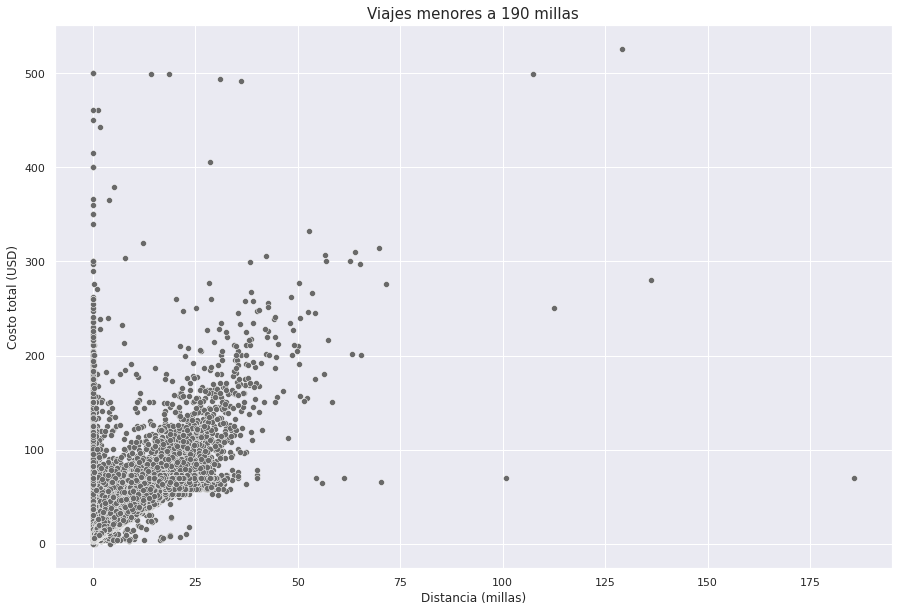

In [ ]:
#We graph the distance-to-total-cost ratio

sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.scatterplot(df['trip_distance'],df['total_amount'], color='#696969')

ax.set_title('Viajes menores a 190 millas', fontdict={'fontsize':15})
ax.set_xlabel('Distancia (millas)', fontdict={'fontsize':12})
ax.set_ylabel('Costo total (USD)', fontdict={'fontsize':12})


In [ ]:
#All records with distance greater than 75 and total cost greater than 350 are considered outliers and discarded.
df = df[(df.trip_distance < 75) & (df.total_amount <350)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Costo total (USD)')

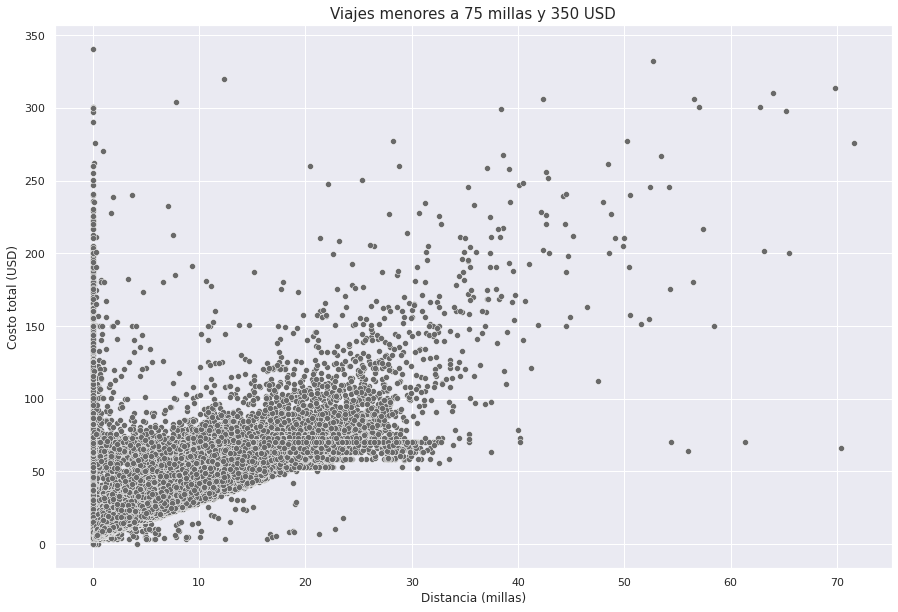

In [ ]:
#Graphing again
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.scatterplot(df['trip_distance'],df['total_amount'], color='#696969')

ax.set_title('Viajes menores a 75 millas y 350 USD', fontdict={'fontsize':15})
ax.set_xlabel('Distancia (millas)', fontdict={'fontsize':12})
ax.set_ylabel('Costo total (USD)', fontdict={'fontsize':12})

In [ ]:
#From the graph, the number of trips with zero distance is striking.
#Because they are immaterial, they are disregarded from the analysis.

print(df[df.trip_distance == 0].shape[0] / df.shape[0])
df = df[df.trip_distance > 0]

0.0033775923083966056


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Costo total (USD)')

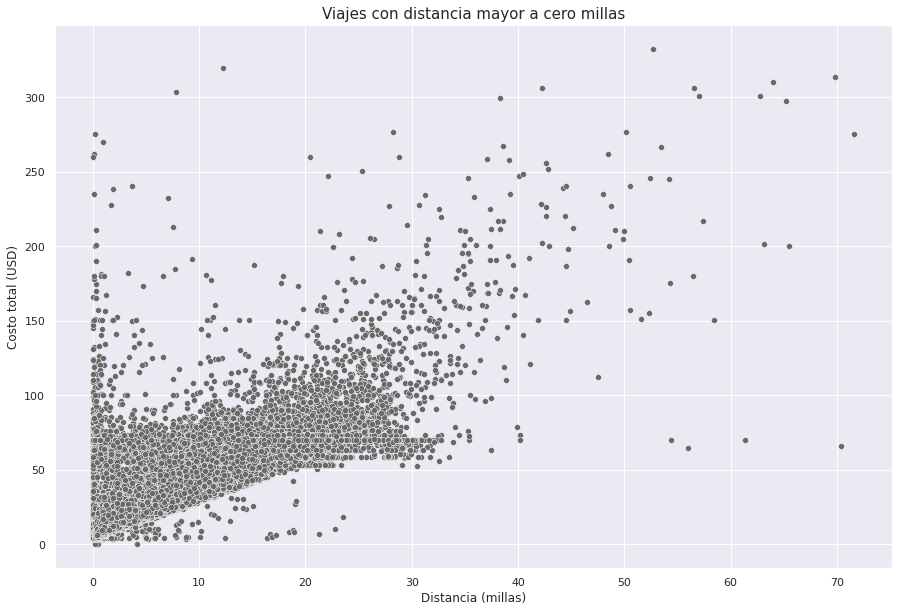

In [ ]:
#Graphing again

sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.scatterplot(df['trip_distance'],df['total_amount'], color='#696969')

ax.set_title('Viajes con distancia mayor a cero millas', fontdict={'fontsize':15})
ax.set_xlabel('Distancia (millas)', fontdict={'fontsize':12})
ax.set_ylabel('Costo total (USD)', fontdict={'fontsize':12})

In [ ]:
#For the universe of trips with a distance of less than 5 miles, the 95th percentile of total_amount is $23.
df2 = df[(df.trip_distance < 5)]
df2.describe(percentiles=[0.05*x for x in range(1,20)]).round()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1005785.0,1005785.0,1005785.0,1005785.0,1005785.0,1005785.0,1005785.0,1005785.0,1005785.0,1005785.0,1005785.0,1005785.0,1005785.0,1005785.0
mean,2.0,2.0,2.0,1.0,164.0,163.0,1.0,10.0,0.0,0.0,2.0,0.0,0.0,13.0
std,0.0,1.0,1.0,0.0,67.0,69.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,6.0
min,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5%,1.0,1.0,0.0,1.0,48.0,45.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,7.0
10%,1.0,1.0,1.0,1.0,68.0,68.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,7.0
15%,1.0,1.0,1.0,1.0,79.0,79.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0,8.0
20%,1.0,1.0,1.0,1.0,100.0,90.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0,8.0
25%,1.0,1.0,1.0,1.0,113.0,113.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0,9.0
30%,1.0,1.0,1.0,1.0,140.0,137.0,1.0,7.0,0.0,0.0,1.0,0.0,0.0,10.0


In [ ]:
#We discourage trips of less than 5 miles and a cost of more than $80 (immaterial amount).

df2 = df[(df.trip_distance < 5) & (df.total_amount >80)]
df2.shape[0]

183

In [ ]:
df = df.drop(df[(df.trip_distance < 5) & (df.total_amount >80)].index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Costo total (USD)')

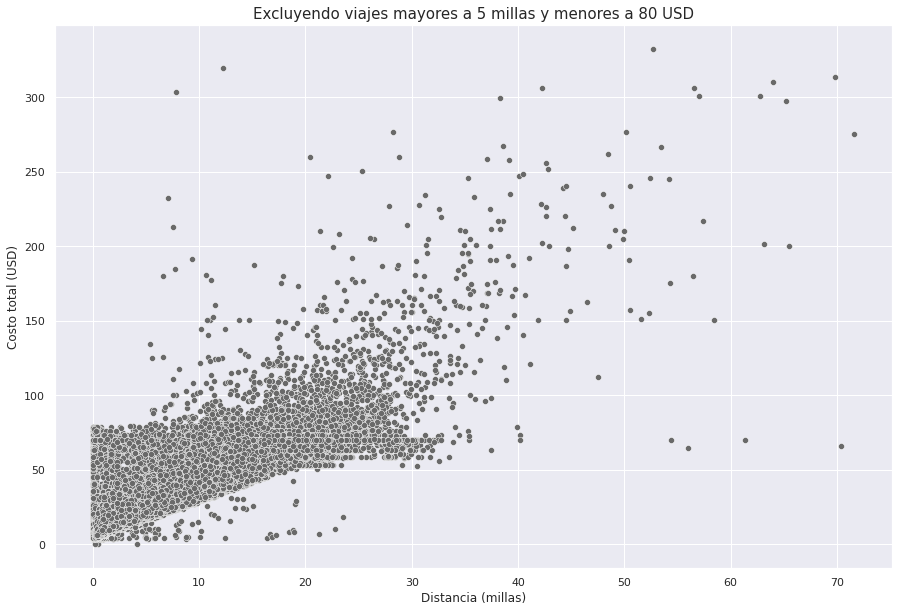

In [ ]:
#Graphing again

sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.scatterplot(df['trip_distance'],df['total_amount'], color='#696969')

ax.set_title('Excluyendo viajes mayores a 5 millas y menores a 80 USD', fontdict={'fontsize':15})
ax.set_xlabel('Distancia (millas)', fontdict={'fontsize':12})
ax.set_ylabel('Costo total (USD)', fontdict={'fontsize':12})

# Merge de Locaciones

In [ ]:
# drive.mount("/content/gdrive", force_remount=True)
# location = "/content/gdrive/My Drive/1-Programación para el análisis de datos/Taxi_yellow_trip/taxi+_zone_lookup.csv"

In [ ]:
# df_zone = pd.read_csv(location, low_memory = False)

In [ ]:
# Since we use PyDrive above, we can replicate access to any document we have in our
# document we have in our Drive folder
link = 'https://drive.google.com/file/d/1YERjJP5N7bqQqzqbzue4OH4PK5eAoZ1c/view?usp=sharing'

id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('taxi+_zone_lookup.csv')

df_zone = pd.read_csv('taxi+_zone_lookup.csv')

In [ ]:
# We check that the data frame has been loaded correctly.
df_zone.head(3)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone


In [ ]:
df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-07-28 12:30:38,2016-07-28 13:19:22,2,7.04,1,N,141,70,1,34.0,0.0,0.5,6.96,0.00,0.3,41.76
1,2,2016-07-28 11:41:53,2016-07-28 12:07:58,1,9.52,1,N,164,138,1,29.5,0.0,0.5,7.17,5.54,0.3,43.01
2,1,2016-07-03 19:45:44,2016-07-03 20:00:33,2,4.00,1,N,161,79,1,15.0,0.5,0.5,2.00,0.00,0.3,18.30


In [ ]:
# Merge the df of zones to our original data frame
df2 = df.merge(df_zone, left_on= 'PULocationID', right_on = 'LocationID', how='left')
df3 = df2.merge(df_zone, left_on= 'DOLocationID', right_on = 'LocationID', how='left', suffixes=('_PU', '_DO'))
df3.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,LocationID_PU,Borough_PU,Zone_PU,service_zone_PU,LocationID_DO,Borough_DO,Zone_DO,service_zone_DO
0,2,2016-07-28 12:30:38,2016-07-28 13:19:22,2,7.04,1,N,141,70,1,...,0.3,41.76,141,Manhattan,Lenox Hill West,Yellow Zone,70,Queens,East Elmhurst,Boro Zone
1,2,2016-07-28 11:41:53,2016-07-28 12:07:58,1,9.52,1,N,164,138,1,...,0.3,43.01,164,Manhattan,Midtown South,Yellow Zone,138,Queens,LaGuardia Airport,Airports
2,1,2016-07-03 19:45:44,2016-07-03 20:00:33,2,4.00,1,N,161,79,1,...,0.3,18.30,161,Manhattan,Midtown Center,Yellow Zone,79,Manhattan,East Village,Yellow Zone


In [ ]:
df3.groupby(['PULocationID', 'Borough_PU'])[['Borough_PU']].count()

,,Borough_PU
PULocationID,Borough_PU,
1,EWR,12
2,Queens,1
3,Bronx,2
4,Manhattan,3606
6,Staten Island,1
...,...,...
261,Manhattan,6277
262,Manhattan,14357
263,Manhattan,21313


In [ ]:
df3[df3.Borough_PU.isna()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,LocationID_PU,Borough_PU,Zone_PU,service_zone_PU,LocationID_DO,Borough_DO,Zone_DO,service_zone_DO


In [ ]:
df3[df3.Borough_DO.isna()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,LocationID_PU,Borough_PU,Zone_PU,service_zone_PU,LocationID_DO,Borough_DO,Zone_DO,service_zone_DO


In [ ]:
#From the original base we consider that the VendorID, RatecoddeID, store_and_fwd_flag fields do not provide relevant information for our analysis.
#From the merge by locality we keep Borough and Zone.

df = df3[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', 'Borough_PU', 'Zone_PU','DOLocationID', 'Borough_DO', 'Zone_DO','passenger_count', 'trip_distance', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge','total_amount']]

In [ ]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,Borough_PU,Zone_PU,DOLocationID,Borough_DO,Zone_DO,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2016-07-28 12:30:38,2016-07-28 13:19:22,141,Manhattan,Lenox Hill West,70,Queens,East Elmhurst,2,7.04,34.0,0.0,0.5,6.96,0.00,0.3,41.76
1,2016-07-28 11:41:53,2016-07-28 12:07:58,164,Manhattan,Midtown South,138,Queens,LaGuardia Airport,1,9.52,29.5,0.0,0.5,7.17,5.54,0.3,43.01
2,2016-07-03 19:45:44,2016-07-03 20:00:33,161,Manhattan,Midtown Center,79,Manhattan,East Village,2,4.00,15.0,0.5,0.5,2.00,0.00,0.3,18.30
3,2016-07-08 19:42:03,2016-07-08 19:50:45,249,Manhattan,West Village,231,Manhattan,TriBeCa/Civic Center,1,1.80,8.5,1.0,0.5,2.00,0.00,0.3,12.30
4,2016-07-13 05:04:59,2016-07-13 05:22:28,43,Manhattan,Central Park,138,Queens,LaGuardia Airport,1,9.30,26.5,0.5,0.5,5.00,5.54,0.3,38.34


# **Tip analysis**

## tip_perc & tip_score

In [ ]:
# We create a variable that is the total without counting the tips and another one that calculates the % that corresponds to the tip over the total.
df['total_sin_tip'] = df['total_amount'] - df['tip_amount']

df['tip_perc'] = (df['tip_amount'] / df['total_sin_tip']).round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df = df[df['tip_perc']!=float('inf')] # we eliminated this one record where there was only tip

In [ ]:
df.tip_perc.mean() #On average, passengers spend 18.76% more for tips

0.18759192743247682

In [ ]:
#To remove Outliers, we proceed to remove everything above the 99th percentile and everything below the 01st percentile.
tip_perc_99 = df['tip_perc'].quantile(.99)
tip_perc_01 = df['tip_perc'].quantile(.01)

df = df[(df['tip_perc']>tip_perc_01) & (df['tip_perc'] < tip_perc_99)]

Text(0.5, 0, 'Porcentaje de propina')

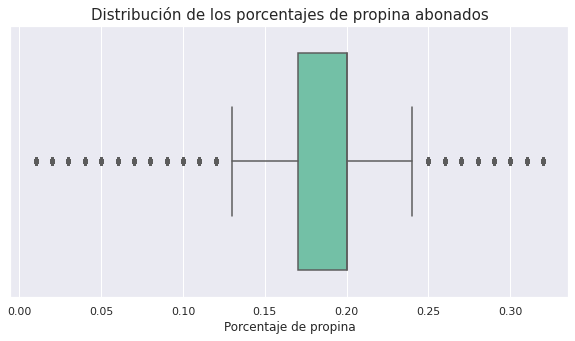

In [ ]:
#We plot the distribution of the variable "tip_perc", i.e. the percentages of tips given.
sns.set(rc = {'figure.figsize':(10,5)})
ax = sns.boxplot(x=df['tip_perc'], orient="V", color='#66CDAA')

ax.set_title('Distribución de los porcentajes de propina abonados', fontdict={'fontsize':15})
ax.set_xlabel('Porcentaje de propina', fontdict={'fontsize':12})

In [ ]:
#We continue to analyse the distribution of %.
df['tip_perc'].describe(percentiles=[0.1,0.25,0.75,0.99]).round(4)*100

count    112405900.0
mean            19.1
std              5.2
min              1.0
10%             11.0
25%             17.0
50%             20.0
75%             20.0
99%             30.0
max             32.0
Name: tip_perc, dtype: float64

In [ ]:
# We could rate the tip_perc field on a scale of 1 to 5 stars according to its distribution.
df['tip_score'] = pd.to_numeric(pd.cut(df['tip_perc'], bins=[0, 0.1,0.18,0.2,0.25, 1], labels=[1,2,3,4,5]))

In [ ]:
# How is this score composed?
df['tip_score'].value_counts(normalize=True)

3    0.549522
2    0.172406
4    0.129878
1    0.089753
5    0.058440
Name: tip_score, dtype: float64

Text(0, 0.5, 'Cantidad de viajes')

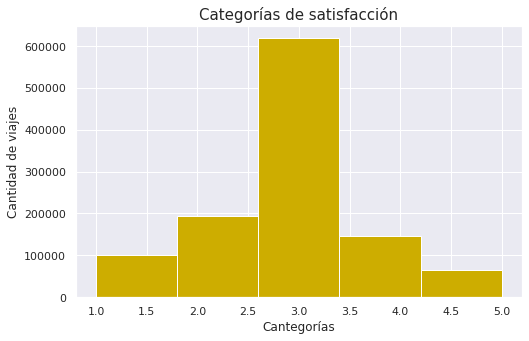

In [ ]:
# We made a histogram to have a more visual explanation of the behaviour of this variable.
fig, ax = plt.subplots(figsize=(8, 5))
df['tip_score'].hist(bins=5, color='#CDAD00');

ax.set_title('Categorías de satisfacción', fontdict={'fontsize':15})
ax.set_xlabel('Cantegorías', fontdict={'fontsize':12})
ax.set_ylabel('Cantidad de viajes', fontdict={'fontsize':12})

## duration - distance - speed

In [ ]:
# We add a new variable which will be the duration in minutes.
df ['duration'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime)
df ['duration']= df['duration']/np.timedelta64(1,'m')

In [ ]:
#Trips with durations longer than zero and no longer than 5 hours
df = df[(df.duration > 0) & (df.duration <300)]

In [ ]:
#We generate a new data which is the speed (miles per minute).
df ['speed'] = (df['trip_distance'] / df['duration']).round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Duración (minutos)')

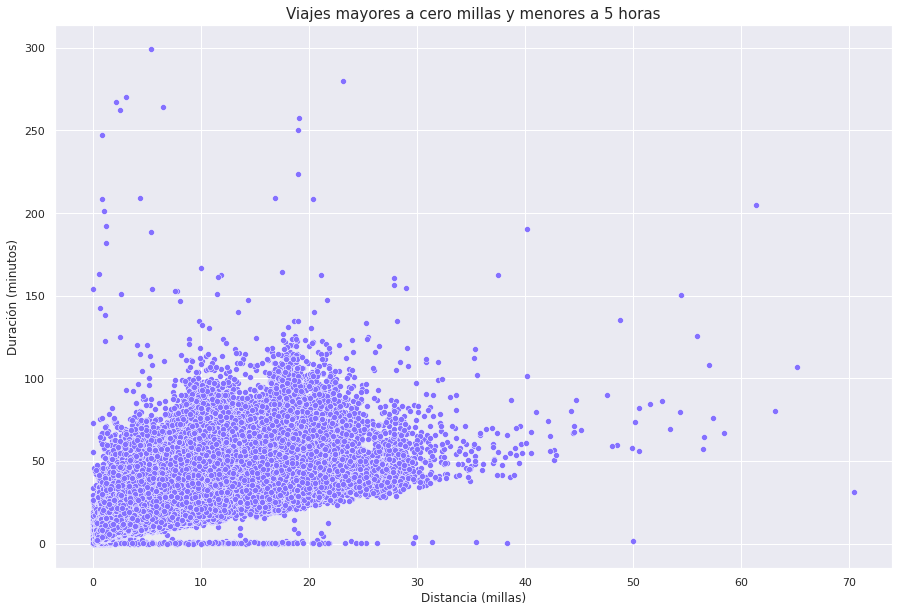

In [ ]:
# We plot the distribution of trips greater than zero miles and less than 5 hs
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.scatterplot(df['trip_distance'],df['duration'], color='#8470FF')

ax.set_title('Viajes mayores a cero millas y menores a 5 horas', fontdict={'fontsize':15})
ax.set_xlabel('Distancia (millas)', fontdict={'fontsize':12})
ax.set_ylabel('Duración (minutos)', fontdict={'fontsize':12})

In [ ]:
df = df.drop(df[(df.duration<35) & (df.speed>1.5)].index) #Eliminamos los viajes que duran menos de 35 minutos y tienen una velocidad promedio mayor a 144 km/h
df = df.drop(df[(df.duration<7) & (df.speed>1)].index) #Eliminamos los viajes que duran menos de 7 minutos y tienen una velocidad promedio mayor a 96 km/h

In [ ]:
df[['duration', 'trip_distance', 'total_amount', 'speed']].describe(percentiles=[0.98,0.99]).round(2)

,duration,trip_distance,total_amount,speed
count,1122388.00,1122388.00,1122388.00,1122388.00
mean,14.97,3.03,17.42,0.19
std,11.27,3.52,12.99,0.10
min,0.02,0.01,3.46,0.00
50%,11.95,1.80,13.30,0.17
98%,47.93,16.50,63.36,0.49
99%,56.38,18.40,69.99,0.56
max,299.02,65.18,332.30,1.42


### Días del mes

In [ ]:
duration_day_month = df.groupby(df.tpep_pickup_datetime.dt.day)[['duration', 'trip_distance']].mean().round(2).sort_values(['duration'],ascending = [False])
duration_day_month

,duration,trip_distance
tpep_pickup_datetime,,
15,15.88,2.99
14,15.76,3.05
21,15.58,2.98
7,15.43,3.01
28,15.40,3.08
19,15.38,2.98
16,15.37,3.03
20,15.33,2.99
9,15.30,3.00


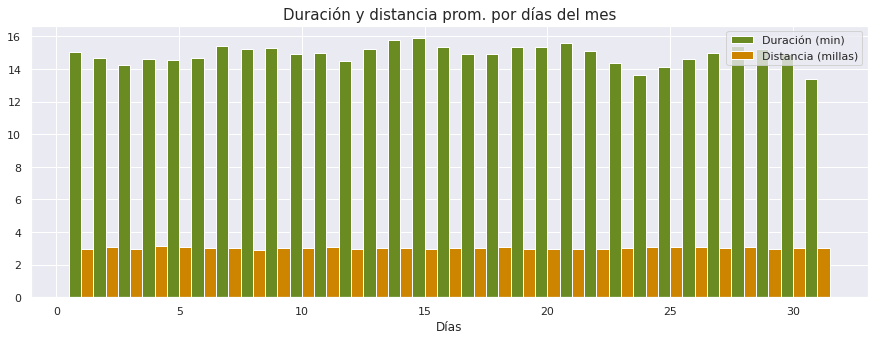

In [ ]:
# Graph Duration and average distance by days of the month
duration_day_month = df.groupby(df.tpep_pickup_datetime.dt.day)[['duration', 'total_amount', 'trip_distance']].mean().round(2)

fig = plt.figure(figsize = (15, 5))
x=duration_day_month.index
y=duration_day_month.duration.values.squeeze()
z=duration_day_month.trip_distance.values.squeeze()

width = 0.5

plt.bar(x-0.25, y, width, color='#698B22')
plt.bar(x+0.25, z, width, color='#CD8500')

plt.title('Duración y distancia prom. por días del mes', fontdict={'fontsize':15})
plt.xlabel('Días', fontdict={'fontsize':12})
plt.legend(['Duración (min)', 'Distancia (millas)'])

plt.show()

### Días de la semana

In [ ]:
# df.groupby(df.tpep_pickup_datetime.dt.dayofweek)[['duration']].mean().round(2).sort_values(['duration'],ascending = [False]) #Monday=0

In [ ]:
df.groupby(df.tpep_pickup_datetime.dt.dayofweek)[['duration', 'trip_distance']].mean().round(2) #Monday=0

,duration,trip_distance
tpep_pickup_datetime,,
0,14.36,3.16
1,15.01,2.93
2,15.51,2.93
3,16.04,2.95
4,15.59,2.96
5,14.09,2.95
6,13.78,3.39


Text(1.0, 1.0, 'Distancia (millas)')

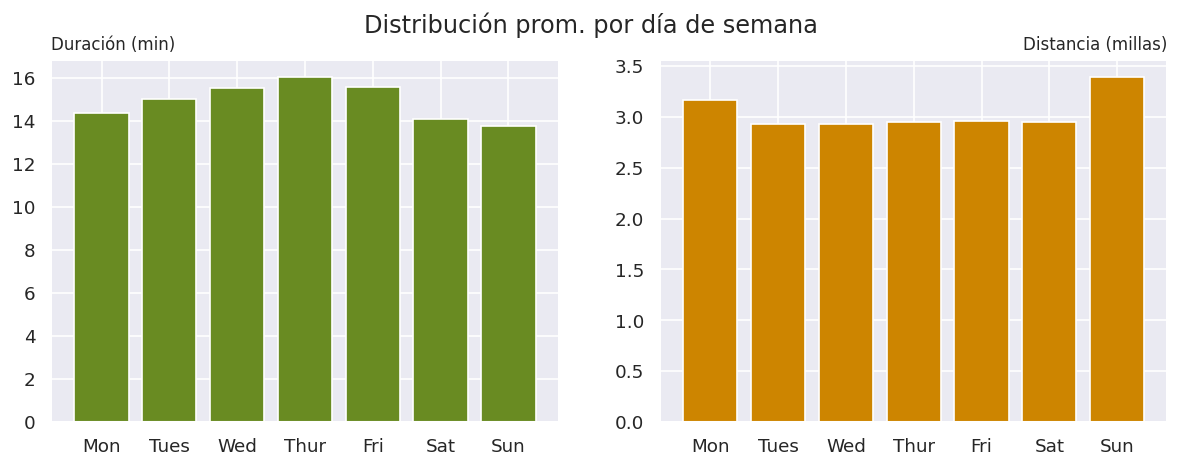

In [ ]:
# Graph Average distribution by weekday
duration_day_week = df.groupby(df.tpep_pickup_datetime.dt.dayofweek)[['duration', 'trip_distance']].mean().round(2) #Monday=0

fig,(ax1, ax2) = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (12,4))
x=duration_day_week.index
y=duration_day_week.duration.values.squeeze()
z=duration_day_week.trip_distance.values.squeeze()

labels=('Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun')
fig.suptitle('Distribución prom. por día de semana', fontdict={'fontsize':11})


ax1.bar(x,y, color='#698B22', tick_label=labels)
ax1.set_title('Duración (min)',fontdict={'fontsize':10}, loc='left')

ax2.bar(x,z, color='#CD8500', tick_label=labels)
ax2.set_title('Distancia (millas)',fontdict={'fontsize':10},  loc='right')

In [ ]:
# fig = plt.figure(figsize = (10, 5))
# x=duration_day_week.index
# y=duration_day_week.duration.values.squeeze()
# z=duration_day_week.trip_distance.values.squeeze()

# labels=('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')

# width = 0.5

# plt.bar(x-0.25, y, width, tick_label=labels)
# plt.bar(x+0.25, z, width)


# plt.title('Duración y distancia por días de semana', fontdict={'fontsize':15})
# plt.xlabel('Días', fontdict={'fontsize':12})
# plt.legend(['Duración (min)', 'Distancia (millas)'])

# plt.show()

### Por Hora

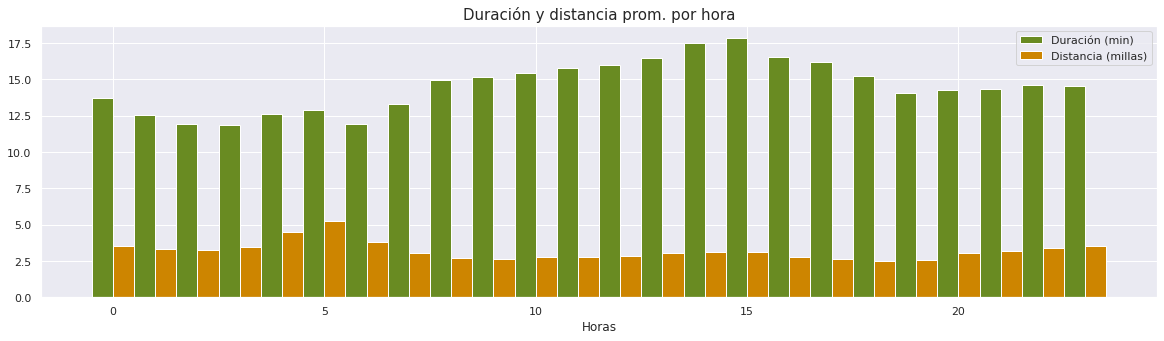

In [ ]:
# Graph Duration and average distance per hour
duration_hour = df.groupby(df.tpep_pickup_datetime.dt.hour)[['duration', 'trip_distance']].mean().round(2)

fig = plt.figure(figsize = (20, 5))
x=duration_hour.index
y=duration_hour.duration.values.squeeze()
z=duration_hour.trip_distance.values.squeeze()

width = 0.5

plt.bar(x-0.25, y, width, color='#698B22')
plt.bar(x+0.25, z, width, color='#CD8500')


plt.title('Duración y distancia prom. por hora', fontdict={'fontsize':15})
plt.xlabel('Horas', fontdict={'fontsize':12})
plt.legend(['Duración (min)', 'Distancia (millas)'])

plt.show()

### Tip Score

In [ ]:
Score_speed_duration = df.groupby('tip_score')[['speed', 'duration', 'trip_distance']].mean().round(2)
# .sort_values(['duration'],ascending = [False])
Score_speed_duration

,speed,duration,trip_distance
tip_score,,,
1,0.20,18.18,3.70
2,0.19,14.46,2.99
3,0.19,14.81,2.98
4,0.19,14.98,3.06
5,0.18,13.00,2.51


Text(0.5, 1.0, 'Velocidad (millas/min)')

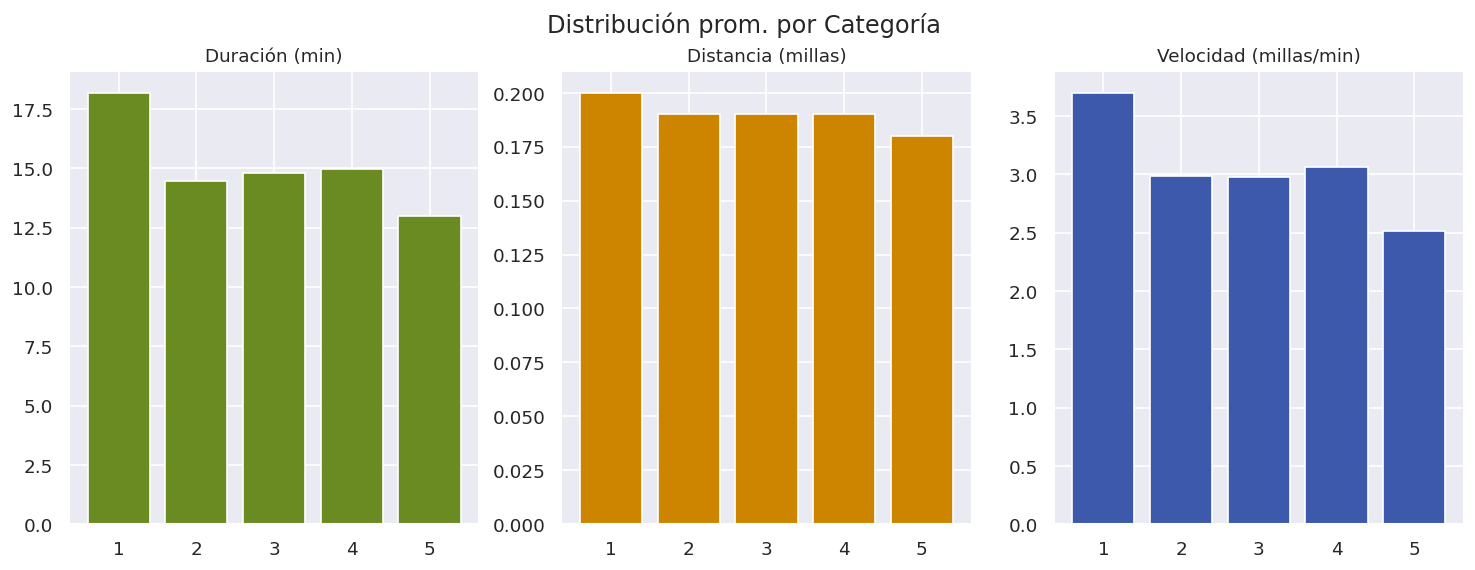

In [ ]:
# Plot Average distribution by tip category and for speed
# distance and time
fig,(ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3,dpi=120,figsize = (15,5))
x=Score_speed_duration.index
y=Score_speed_duration.duration.values.squeeze()
z=Score_speed_duration.trip_distance.values.squeeze()
w=Score_speed_duration.speed.values.squeeze()

fig.suptitle('Distribución prom. por Categoría', fontdict={'fontsize':12})

ax1.bar(x,y, color='#698B22')
ax1.set_title('Duración (min)',fontdict={'fontsize':11})

ax2.bar(x,w, color='#CD8500')
ax2.set_title('Distancia (millas)',fontdict={'fontsize':11})

ax3.bar(x,z, color='#3D59AB')
ax3.set_title('Velocidad (millas/min)',fontdict={'fontsize':11})


## Number of passengers

In [ ]:
df.passenger_count.value_counts()

1    808766
2    158998
5     55840
3     43724
6     35263
4     19793
0         4
Name: passenger_count, dtype: int64

In [ ]:
#Of the trips without passengers, almost all have a duration of less than one minute, which is why we consider that they are not correct and dismiss the analysis of the universe of trips without passengers.

df[df['passenger_count'] ==0]

,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,Borough_PU,Zone_PU,DOLocationID,Borough_DO,Zone_DO,passenger_count,trip_distance,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,total_sin_tip,tip_perc,tip_score,duration,speed
182442,2016-07-14 21:19:39,2016-07-14 21:19:47,164,Manhattan,Midtown South,164,Manhattan,Midtown South,0,0.01,...,0.5,1.96,0.0,0.3,11.76,9.8,0.20,3,0.133333,0.08
311513,2016-08-22 12:44:35,2016-08-22 13:22:28,107,Manhattan,Gramercy,68,Manhattan,East Chelsea,0,1.40,...,0.5,4.45,0.0,0.3,26.75,22.3,0.20,3,37.883333,0.04
618776,2016-10-26 19:17:45,2016-10-26 19:17:48,237,Manhattan,Upper East Side South,237,Manhattan,Upper East Side South,0,0.02,...,0.5,2.45,0.0,0.3,12.25,9.8,0.25,4,0.050000,0.40
1047572,2016-12-19 12:47:37,2016-12-19 12:47:56,113,Manhattan,Greenwich Village North,113,Manhattan,Greenwich Village North,0,0.01,...,0.5,4.59,0.0,0.3,19.89,15.3,0.30,5,0.316667,0.03


In [ ]:
df = df[df['passenger_count'] >0]

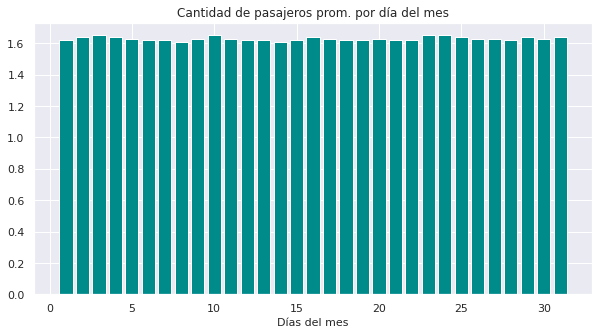

In [ ]:
#Number of passengers per day of the month
Qpass_day_month = df.groupby(df.tpep_pickup_datetime.dt.day)[['passenger_count']].mean().round(2)

fig = plt.figure(figsize = (10, 5))
x=Qpass_day_month.index
y=Qpass_day_month.values.squeeze()
plt.bar(x, y, color='#008B8B')


plt.title('Cantidad de pasajeros prom. por día del mes', fontdict={'fontsize':12})
plt.xlabel('Días del mes', fontdict={'fontsize':11})


plt.show()

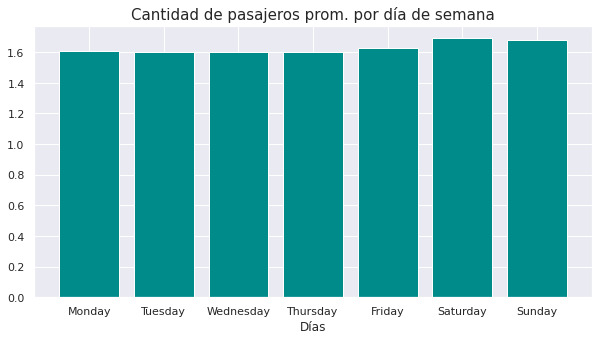

In [ ]:
#Number of journeys per day of the week
Qpass_day_week = df.groupby(df.tpep_pickup_datetime.dt.dayofweek)[['passenger_count']].mean().round(2) #Monday=0

fig = plt.figure(figsize = (10, 5))
x=Qpass_day_week.index
y=Qpass_day_week.values.squeeze()
labels=('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')

plt.title('Cantidad de pasajeros prom. por día de semana', fontdict={'fontsize':15})
plt.xlabel('Días', fontdict={'fontsize':12})

plt.bar(x, y, tick_label=labels, color='#008B8B')
plt.show()

In [ ]:
Qpass_hour = df.groupby(df.tpep_pickup_datetime.dt.hour)[['passenger_count']].mean().round(2).sort_values(by =['passenger_count'], ascending = False)

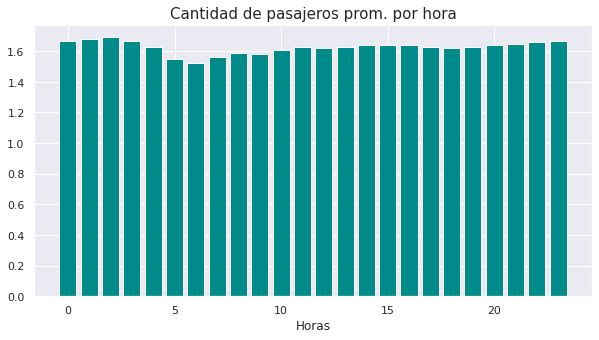

In [ ]:
#Number of vessels per hour
#From 21 to 03 there is a progressive increase which then decreases with a floor at 6hs.
Qpass_hour = df.groupby(df.tpep_pickup_datetime.dt.hour)[['passenger_count']].mean().round(2)

fig = plt.figure(figsize = (10, 5))
x=Qpass_hour.index
y=Qpass_hour.values.squeeze()
plt.bar(x, y, color='#008B8B')

plt.title('Cantidad de pasajeros prom. por hora', fontdict={'fontsize':15})
plt.xlabel('Horas', fontdict={'fontsize':12})

plt.show()

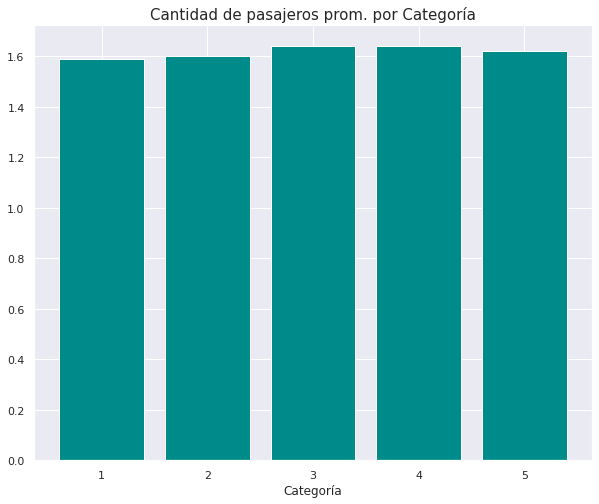

In [ ]:
#Tips in relation to the number of passengers
Qpass_tipscore = df.groupby('tip_score')[['passenger_count']].mean().round(2)

fig = plt.figure(figsize = (10, 8))
x=Qpass_tipscore.index
y=Qpass_tipscore.values.squeeze()

plt.title('Cantidad de pasajeros prom. por Categoría', fontdict={'fontsize':15})
plt.xlabel('Categoría', fontdict={'fontsize':12})

plt.bar(x, y,color='#008B8B')
plt.show()

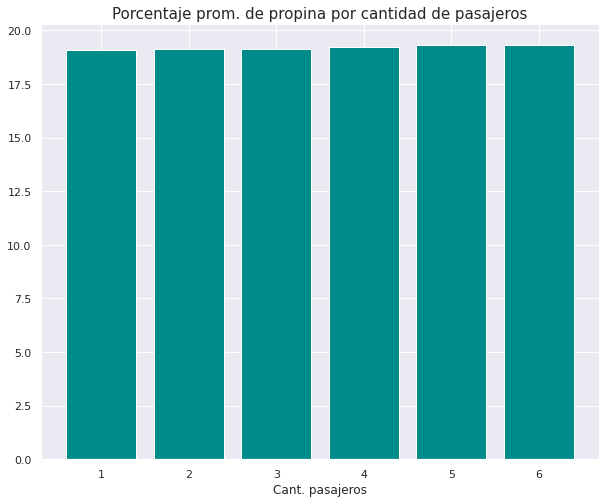

In [ ]:
Qpass_tipperc = df.groupby('passenger_count')[['tip_perc']].mean().round(4)*100

fig = plt.figure(figsize = (10, 8))
x=Qpass_tipperc.index
y=Qpass_tipperc.values.squeeze()

plt.title('Porcentaje prom. de propina por cantidad de pasajeros', fontdict={'fontsize':15})
plt.xlabel('Cant. pasajeros', fontdict={'fontsize':12})

plt.bar(x, y,color='#008B8B')
plt.show()

## Distribution of tip_perc

### By day of the month

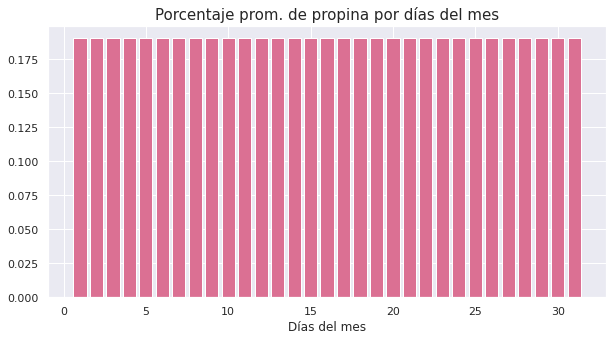

In [ ]:
tip_day_month = df.groupby(df.tpep_pickup_datetime.dt.day)[['tip_perc']].mean().round(2)

fig = plt.figure(figsize = (10, 5))
x=tip_day_month.index
y=tip_day_month.values.squeeze()


plt.title('Porcentaje prom. de propina por días del mes', fontdict={'fontsize':15})
plt.xlabel('Días del mes', fontdict={'fontsize':12})

plt.bar(x, y, color='#DB7093')
plt.show()

### By day of the week

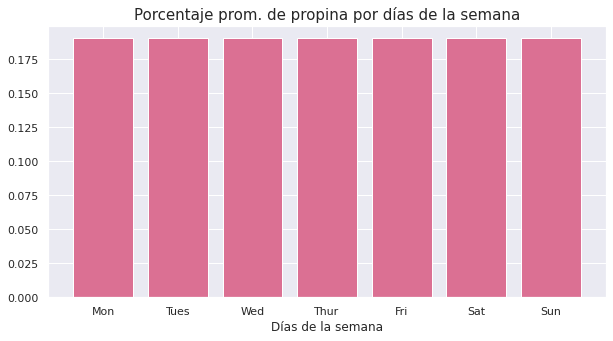

In [ ]:
tip_day_week = df.groupby(df.tpep_pickup_datetime.dt.dayofweek)[['tip_perc']].mean().round(2)

fig = plt.figure(figsize = (10, 5))
x=tip_day_week.index
y=tip_day_week.values.squeeze()

labels=('Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun')
plt.title('Porcentaje prom. de propina por días de la semana', fontdict={'fontsize':15})
plt.xlabel('Días de la semana', fontdict={'fontsize':12})

plt.bar(x, y, color='#DB7093', tick_label=labels)
plt.show()

### By hour of the day

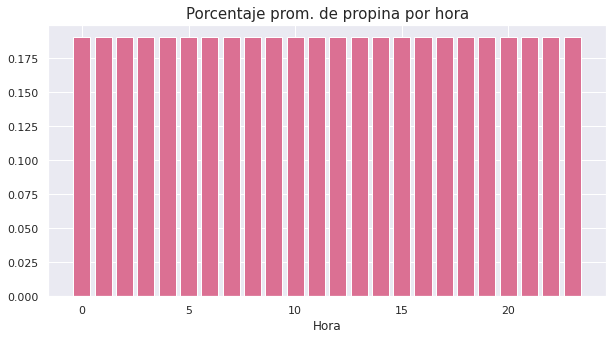

In [ ]:
tip_day_hour = df.groupby(df.tpep_pickup_datetime.dt.hour)[['tip_perc']].mean().round(2)

fig = plt.figure(figsize = (10, 5))
x=tip_day_hour.index
y=tip_day_hour.values.squeeze()

plt.title('Porcentaje prom. de propina por hora', fontdict={'fontsize':15})
plt.xlabel('Hora', fontdict={'fontsize':12})

plt.bar(x, y, color='#DB7093')

plt.show()

## Climate analysis

In [ ]:
# We import climate data
link = 'https://drive.google.com/file/d/1P2vC0wjDgCuIajJ5TBt_nRGbj4EY1XKD/view?usp=sharing'

id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Weather.csv')

df_weather = pd.read_csv('Weather.csv')

In [ ]:
#We preview the data
df_weather.head()

,pickup_datetime,tempm,tempi,dewptm,dewpti,hum,wspdm,wspdi,wgustm,wgusti,...,precipm,precipi,conds,icon,fog,rain,snow,hail,thunder,tornado
0,2015-12-31 00:15:00,7.8,46.0,6.1,43.0,89.0,7.4,4.6,NaN,NaN,...,0.5,0.02,Light Rain,rain,0,1,0,0,0,0
1,2015-12-31 00:42:00,7.8,46.0,6.1,43.0,89.0,7.4,4.6,NaN,NaN,...,0.8,0.03,Overcast,cloudy,0,0,0,0,0,0
2,2015-12-31 00:51:00,7.8,46.0,6.1,43.0,89.0,5.6,3.5,NaN,NaN,...,0.8,0.03,Overcast,cloudy,0,0,0,0,0,0
3,2015-12-31 01:51:00,7.2,45.0,5.6,42.1,90.0,7.4,4.6,NaN,NaN,...,0.3,0.01,Overcast,cloudy,0,0,0,0,0,0
4,2015-12-31 02:51:00,7.2,45.0,5.6,42.1,90.0,0.0,0.0,NaN,NaN,...,NaN,NaN,Overcast,cloudy,0,0,0,0,0,0


In [ ]:
#We see all columns
df_weather.columns

Index(['pickup_datetime', 'tempm', 'tempi', 'dewptm', 'dewpti', 'hum', 'wspdm',
       'wspdi', 'wgustm', 'wgusti', 'wdird', 'wdire', 'vism', 'visi',
       'pressurem', 'pressurei', 'windchillm', 'windchilli', 'heatindexm',
       'heatindexi', 'precipm', 'precipi', 'conds', 'icon', 'fog', 'rain',
       'snow', 'hail', 'thunder', 'tornado'],
      dtype='object')

In [ ]:
#We check that the limits correspond to what we need.
df_weather['pickup_datetime'].max(), df_weather['pickup_datetime'].min()

('2016-12-31 23:51:00', '2015-12-31 00:15:00')

In [ ]:
# We convert the date into the format we require
df_weather['pickup_datetime'] = pd.to_datetime(df_weather['pickup_datetime']).dt.strftime('%Y-%m-%d %H')

In [ ]:
# We drop the duplicate dates that were generated in the date format change
df_weather = df_weather.drop_duplicates(subset='pickup_datetime', keep='last')

In [ ]:
# We convert the date of our Dataset into the format we need.
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.strftime('%Y-%m-%d %H')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime']).dt.strftime('%Y-%m-%d %H')

In [ ]:
#Check that it is ok
df['tpep_pickup_datetime']

0          2016-07-28 12
1          2016-07-28 11
2          2016-07-03 19
3          2016-07-08 19
4          2016-07-13 05
               ...      
1186284    2016-12-02 06
1186285    2016-12-29 21
1186286    2016-12-18 15
1186287    2016-12-03 20
1186288    2016-12-03 15
Name: tpep_pickup_datetime, Length: 1122384, dtype: object

In [ ]:
#We perform the Merge between our Dataset and the climate Dataset.
df = df.merge(df_weather[['pickup_datetime', 'tempm', 'conds', 'icon', 'fog', 'rain','snow', 'hail', 'thunder', 'tornado']], left_on='tpep_pickup_datetime', right_on='pickup_datetime')

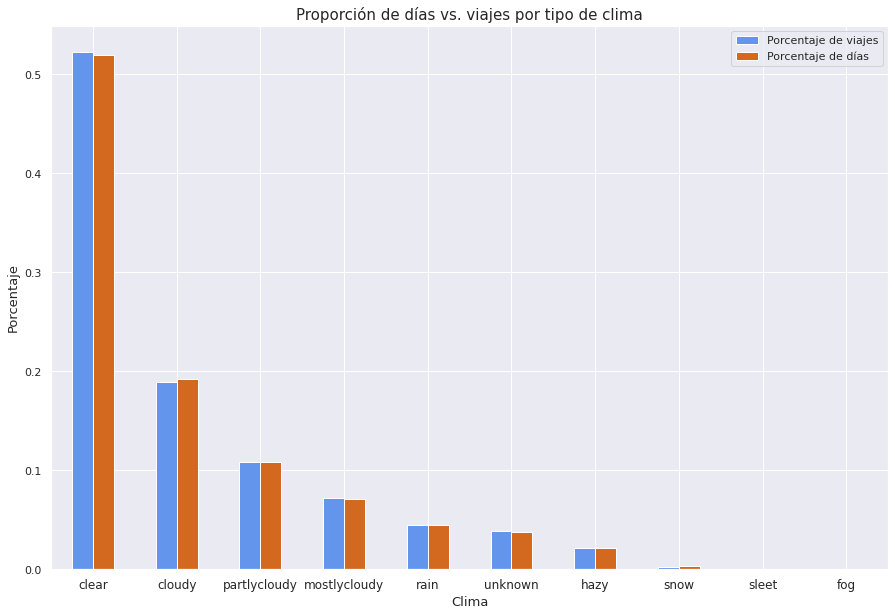

In [ ]:
#We compare the distribution of the weather over the year vs. the number of trips. We can see that there is a slight tendency to take more taxis when it rains.
a = df.icon.value_counts(normalize=True)
b = df_weather[df_weather['pickup_datetime']>'2016-06-31'].icon.value_counts(normalize=True)
pd.DataFrame([a,b]).T.plot.bar(rot=0, color=['#6495ED', '#D2691E'])

plt.xticks(fontsize=12)
plt.title('Proporción de días vs. viajes por tipo de clima', fontdict={'fontsize':15})
plt.xlabel('Clima', fontdict={'fontsize':13})
plt.ylabel('Porcentaje', fontdict={'fontsize':13})
plt.legend(['Porcentaje de viajes', 'Porcentaje de días'])

Text(0, 0.5, 'Clima')

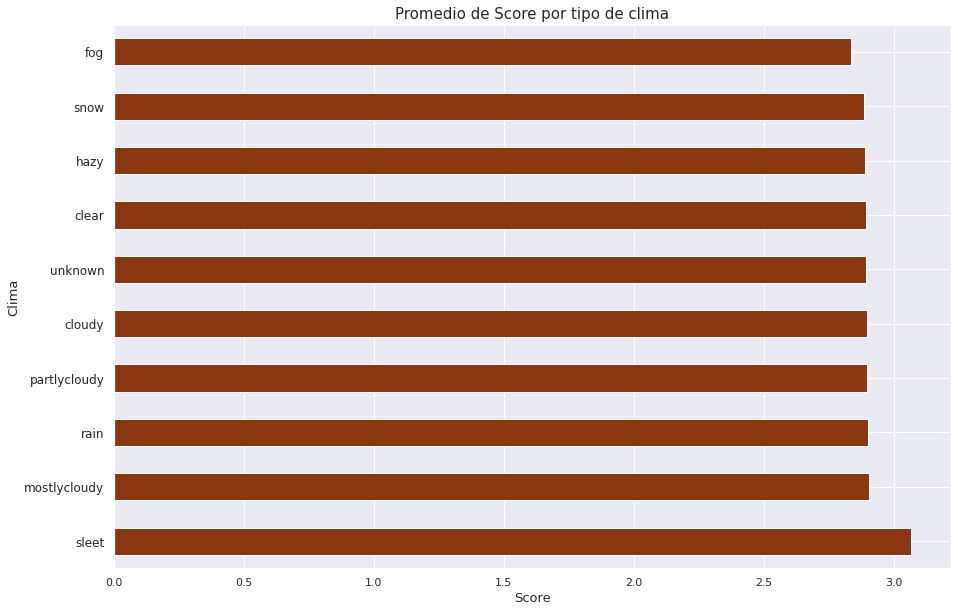

In [ ]:
#Vemos score according to the type of climate
df.groupby('icon')['tip_score'].mean().sort_values(ascending=False).plot.barh(color='#8A360F')

plt.yticks(fontsize=12)
plt.title('Promedio de Score por tipo de clima', fontdict={'fontsize':15})
plt.xlabel('Score', fontdict={'fontsize':13})
plt.ylabel('Clima', fontdict={'fontsize':13})

In [ ]:
df[df['tip_score']!=3].groupby('icon')['tip_score'].mean() #We tried taking out the "neutrals" but it doesn't seem to change much.

icon
clear           2.760104
cloudy          2.774097
fog             2.625000
hazy            2.758422
mostlycloudy    2.787264
partlycloudy    2.775663
rain            2.786395
sleet           3.142857
snow            2.752130
unknown         2.763527
Name: tip_score, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Porcentaje de propina')

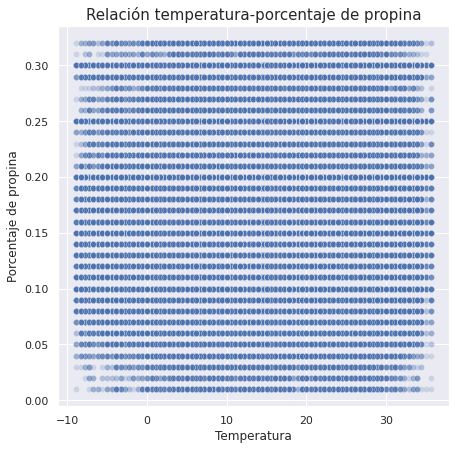

In [ ]:
sns.set(rc = {'figure.figsize':(7,7)})
ax = sns.scatterplot(df['tempm'], df['tip_perc'], alpha=0.2) #There does not seem to be any strong relationship between temperature and tipping percentage.

ax.set_title('Relación temperatura-porcentaje de propina', fontdict={'fontsize':15})
ax.set_xlabel('Temperatura', fontdict={'fontsize':12})
ax.set_ylabel('Porcentaje de propina', fontdict={'fontsize':12})

tip_score
1    16.039996
2    16.029151
3    16.087122
4    16.037989
5    15.793905
Name: tempm, dtype: float64

Text(0, 0.5, 'Temperatura')

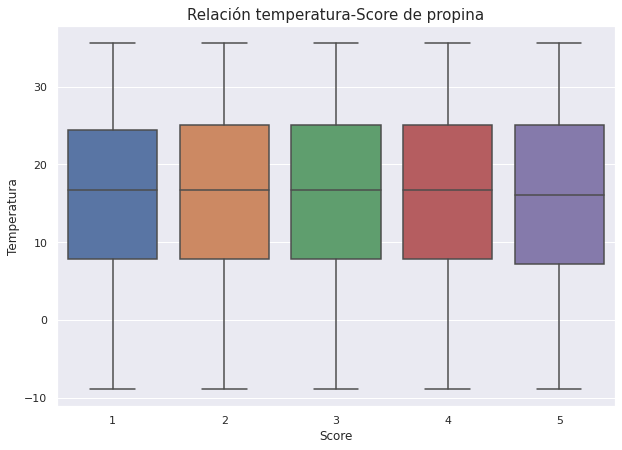

In [ ]:
#The relationship between tip score and temperature does not appear to be significant either.
display(df.groupby('tip_score')['tempm'].mean())
sns.set(rc = {'figure.figsize':(10,7)})
ax = sns.boxplot(x=df['tip_score'],y=df['tempm'])

ax.set_title('Relación temperatura-Score de propina', fontdict={'fontsize':15})
ax.set_xlabel('Score', fontdict={'fontsize':12})
ax.set_ylabel('Temperatura', fontdict={'fontsize':12})

## Public holidays

In [ ]:
#We import the data of the festive dates
link = 'https://drive.google.com/file/d/1FekLXAxlgxz7ejtAdE3XCohAsJJdrw-K/view?usp=sharing'

id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('us_holidays.csv')

df_holidays = pd.read_csv('us_holidays.csv')

In [ ]:
#We preview the data
df_holidays.head(3)

,date,holiday_name,holiday,year,month,wday,weekend,long_holiday,school_break,dayno
0,2012-01-01,New Year Day,True,2012,1,7,True,True,christmas_break,1
1,2012-01-02,FALSE,False,2012,1,1,False,False,no_break,2
2,2012-01-03,FALSE,False,2012,1,2,False,False,no_break,3


In [ ]:
# We caste to the date format we need
df_holidays['date'] = pd.to_datetime(df_holidays['date'])

In [ ]:
#Create a date variable without times in order to be able to merge
df['pick_up_datetime_no_hours'] = pd.to_datetime(pd.to_datetime(df['tpep_pickup_datetime']).dt.strftime('%Y-%m-%d'))

In [ ]:
#We performed the Merge
df = df.merge(df_holidays[['date', 'holiday_name', 'holiday', 'long_holiday', 'school_break']], left_on='pick_up_datetime_no_hours', right_on = 'date')

Text(0, 0.5, 'Fechas')

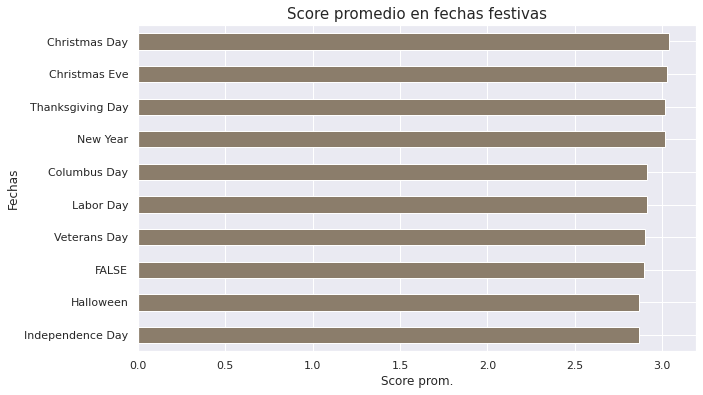

In [ ]:
#Analysing the average score by holiday date
df.groupby('holiday_name')['tip_score'].mean().sort_values(ascending=True).plot.barh(ylim=(2.5,3.5),figsize = (10,6), color='#8B7D6B')

plt.title('Score promedio en fechas festivas', fontdict={'fontsize':15})
plt.xlabel('Score prom.', fontdict={'fontsize':12})
plt.ylabel('Fechas', fontdict={'fontsize':12})

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

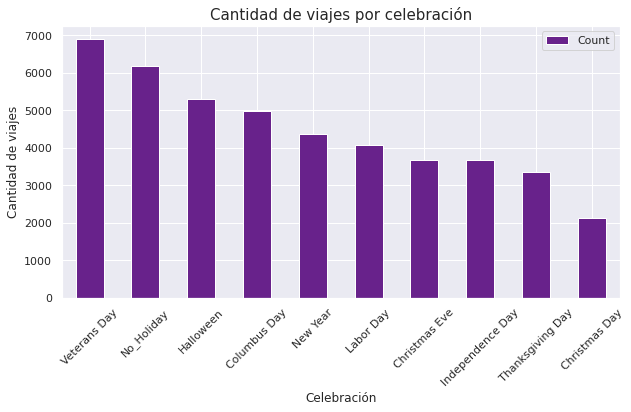

In [ ]:
#Number of trips per celebration
dias_sin_holiday = df[df['holiday']==False].date.nunique()
promedio_viajes_sin_holiday = len(df[df['holiday']==False])/dias_sin_holiday

tmp = df[df['holiday']==True].groupby('holiday_name')['holiday_name'].count().to_frame().rename(columns={'holiday_name':'Count'}).reset_index()
sin_holiday = {'holiday_name':'No_Holiday', 'Count':promedio_viajes_sin_holiday}
tmp.append(sin_holiday, ignore_index=True).set_index('holiday_name').sort_values(by='Count', ascending=False).plot.bar(figsize = (10,5), color='#68228B')

plt.title('Cantidad de viajes por celebración', fontdict={'fontsize':15})
plt.xlabel('Celebración', fontdict={'fontsize':12})
plt.ylabel('Cantidad de viajes', fontdict={'fontsize':12})
plt.xticks(rotation = 45)

## Relationship between place and type

In [ ]:
# Number of trips per pickup zone
trips_pickup = pd.DataFrame(df.Borough_PU.value_counts().reset_index().values, columns=["Zone", "Quantity"])
trips_pickup_index = trips_pickup.sort_index(axis = 0, ascending=True)
trips_pickup_index

,Zone,Quantity
0,Manhattan,1028108
1,Queens,60215
2,Brooklyn,16408
3,Unknown,14994
4,Bronx,348
5,Staten Island,43
6,EWR,1


In [ ]:
# Percentage that these trips represent over the entire sample
trips_pickup_index['Percentage'] = (trips_pickup_index['Quantity'] / (df.shape[0]))*100
trips_pickup_index

,Zone,Quantity,Percentage
0,Manhattan,1028108,91.785769
1,Queens,60215,5.375778
2,Brooklyn,16408,1.464847
3,Unknown,14994,1.33861
4,Bronx,348,0.031068
5,Staten Island,43,0.003839
6,EWR,1,0.000089


In [ ]:
# We create a dataframe with the variables we are interested in and count the number of variables.
trips_zone_PU_and_tips = df.groupby(['Borough_PU', 'tip_score'])['Borough_PU'].count().reset_index(name="quantity")
trips_zone_PU_and_tips

,Borough_PU,tip_score,quantity
0,Bronx,1,54
1,Bronx,2,55
2,Bronx,3,158
3,Bronx,4,55
4,Bronx,5,26
5,Brooklyn,1,1380
6,Brooklyn,2,2261
7,Brooklyn,3,9190
8,Brooklyn,4,2385
9,Brooklyn,5,1192


In [ ]:
# We generate a data frame with the pick up zone and the tip score.
data = df[['Borough_PU', 'tip_score']]
filter_list = ['EWR','Unknown']
data = data.drop(data[(data.Borough_PU.isin(filter_list))].index)

data

,Borough_PU,tip_score
0,Manhattan,3
1,Manhattan,3
2,Manhattan,2
3,Manhattan,3
4,Manhattan,1
...,...,...
1120112,Manhattan,2
1120113,Manhattan,3
1120114,Manhattan,3
1120115,Manhattan,2


In [ ]:
# Relationship between pick up and tip
cross_tab_prop = pd.crosstab(index=data['Borough_PU'],
                             columns=data['tip_score'],
                             normalize="index")
cross_tab_prop = cross_tab_prop.round(2)
cross_tab_prop

tip_score,1,2,3,4,5
Borough_PU,,,,,
Bronx,0.16,0.16,0.45,0.16,0.07
Brooklyn,0.08,0.14,0.56,0.15,0.07
Manhattan,0.09,0.17,0.55,0.13,0.06
Queens,0.09,0.17,0.55,0.15,0.05
Staten Island,0.05,0.09,0.58,0.23,0.05


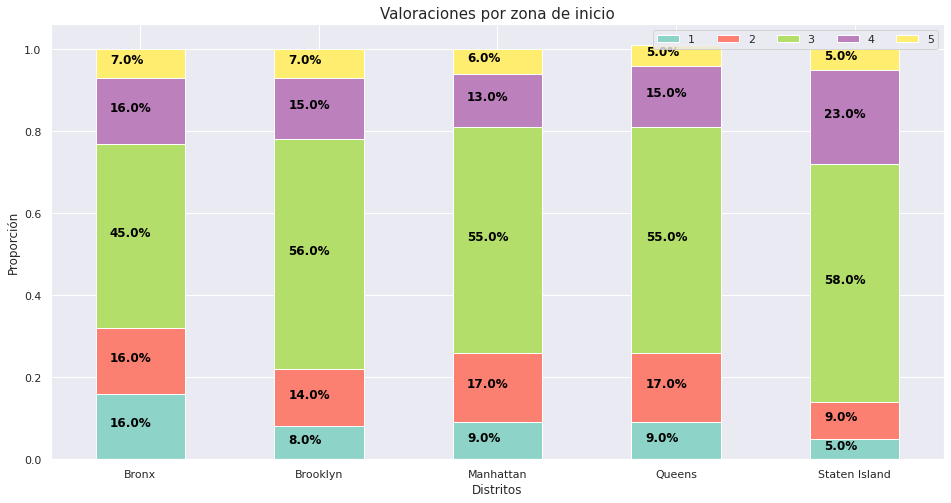

In [ ]:
# Stack chart relating neighbourhood to tipping scale
cross_tab_prop.plot(kind='bar',
                        stacked=True,
                        colormap='Set3',
                        # colormap='RdYlGn',
                        figsize=(16, 8))

plt.legend(loc="upper right", ncol=5)
plt.xlabel("Distritos", fontdict={'fontsize':12})
plt.ylabel("Proporción", fontdict={'fontsize':12})
plt.title("Valoraciones por zona de inicio",fontdict={'fontsize':15})
plt.xticks(rotation = 0)

for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):

        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

In [ ]:
# We create a data frame for the drop off and the tip score.
data_do = df[['Borough_DO', 'tip_score']]
filter_list = ['Unknown']
data_do = data_do.drop(data_do[(data_do.Borough_DO.isin(filter_list))].index)
data_do

,Borough_DO,tip_score
0,Queens,3
1,Manhattan,3
2,Manhattan,2
3,Manhattan,3
4,Manhattan,1
...,...,...
1120112,Manhattan,2
1120113,Manhattan,3
1120114,Brooklyn,3
1120115,Queens,2


In [ ]:
# We generate a data frame with the proportions of the drop OFF and tip scale.
cross_tab_prop_do = pd.crosstab(index=data_do['Borough_DO'],
                             columns=data_do['tip_score'],
                             normalize="index")
cross_tab_prop_do = cross_tab_prop_do.round(2)
cross_tab_prop_do

tip_score,1,2,3,4,5
Borough_DO,,,,,
Bronx,0.19,0.19,0.43,0.12,0.07
Brooklyn,0.09,0.15,0.56,0.14,0.06
EWR,0.14,0.16,0.44,0.16,0.11
Manhattan,0.09,0.17,0.55,0.13,0.06
Queens,0.09,0.16,0.53,0.16,0.06
Staten Island,0.05,0.11,0.57,0.20,0.07


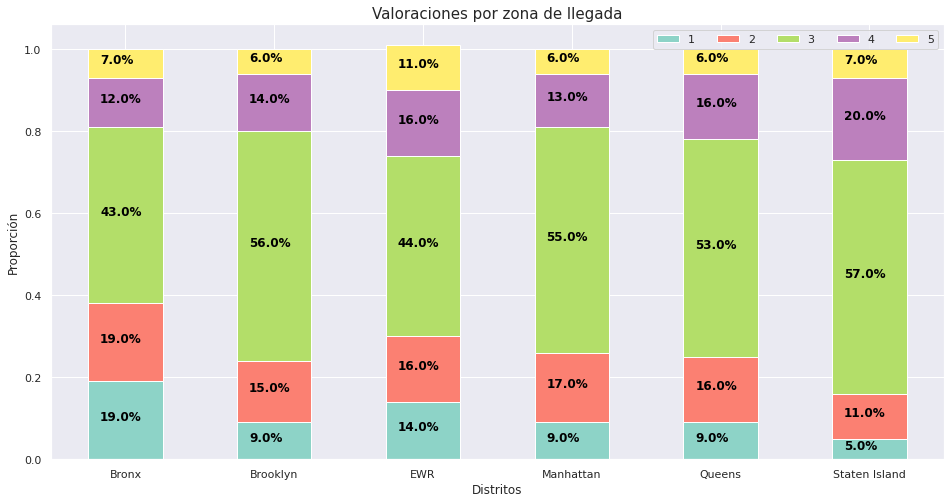

In [ ]:
# Neighbourhood stack type graph vs its tip score
cross_tab_prop_do.plot(kind='bar',
                        stacked=True,
                        colormap='Set3',
                        figsize=(16, 8))

plt.legend(loc="upper right", ncol=5)
plt.xlabel("Distritos", fontdict={'fontsize':12})
plt.ylabel("Proporción", fontdict={'fontsize':12})
plt.title("Valoraciones por zona de llegada",fontdict={'fontsize':15})
plt.xticks(rotation = 0)


for n, x in enumerate([*cross_tab_prop_do.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop_do.loc[x],
                                   cross_tab_prop_do.loc[x].cumsum()):

        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

In [ ]:
# Create a column that is the combination of the pickup and drop off zones
df['Borough_PU_DO'] = df['Borough_PU'].map(str) +'-'+ df['Borough_DO'].map(str)
df

,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,Borough_PU,Zone_PU,DOLocationID,Borough_DO,Zone_DO,passenger_count,trip_distance,...,hail,thunder,tornado,pick_up_datetime_no_hours,date,holiday_name,holiday,long_holiday,school_break,Borough_PU_DO
0,2016-07-28 12,2016-07-28 13,141,Manhattan,Lenox Hill West,70,Queens,East Elmhurst,2,7.04,...,0,0,0,2016-07-28,2016-07-28,FALSE,False,False,summer_break,Manhattan-Queens
1,2016-07-28 12,2016-07-28 12,236,Manhattan,Upper East Side North,236,Manhattan,Upper East Side North,1,0.80,...,0,0,0,2016-07-28,2016-07-28,FALSE,False,False,summer_break,Manhattan-Manhattan
2,2016-07-28 12,2016-07-28 12,107,Manhattan,Gramercy,43,Manhattan,Central Park,2,2.60,...,0,0,0,2016-07-28,2016-07-28,FALSE,False,False,summer_break,Manhattan-Manhattan
3,2016-07-28 12,2016-07-28 13,90,Manhattan,Flatiron,68,Manhattan,East Chelsea,2,3.96,...,0,0,0,2016-07-28,2016-07-28,FALSE,False,False,summer_break,Manhattan-Manhattan
4,2016-07-28 12,2016-07-28 12,107,Manhattan,Gramercy,144,Manhattan,Little Italy/NoLiTa,1,1.92,...,0,0,0,2016-07-28,2016-07-28,FALSE,False,False,summer_break,Manhattan-Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120112,2016-12-25 05,2016-12-25 05,239,Manhattan,Upper West Side South,140,Manhattan,Lenox Hill East,1,2.50,...,0,0,0,2016-12-25,2016-12-25,Christmas Day,True,True,christmas_break,Manhattan-Manhattan
1120113,2016-12-25 05,2016-12-25 05,107,Manhattan,Gramercy,79,Manhattan,East Village,1,0.50,...,0,0,0,2016-12-25,2016-12-25,Christmas Day,True,True,christmas_break,Manhattan-Manhattan
1120114,2016-12-25 05,2016-12-25 05,79,Manhattan,East Village,112,Brooklyn,Greenpoint,2,3.80,...,0,0,0,2016-12-25,2016-12-25,Christmas Day,True,True,christmas_break,Manhattan-Brooklyn
1120115,2016-12-25 05,2016-12-25 05,239,Manhattan,Upper West Side South,132,Queens,JFK Airport,1,19.16,...,0,0,0,2016-12-25,2016-12-25,Christmas Day,True,True,christmas_break,Manhattan-Queens


In [ ]:
# We create a dataframe with the values we are interested in analysing.
data_pu_do = df[['Borough_PU_DO','tip_score']]
data_pu_do.groupby('Borough_PU_DO').count().sort_values(['tip_score'],ascending = [False])
# data_pu_do

,tip_score
Borough_PU_DO,
Manhattan-Manhattan,943692
Manhattan-Brooklyn,40282
Manhattan-Queens,40100
Queens-Manhattan,39553
Unknown-Unknown,12859
Queens-Queens,10158
Brooklyn-Brooklyn,9858
Queens-Brooklyn,9346
Brooklyn-Manhattan,5459


In [ ]:
# Data frame of the ratio between combination and tip scale
cross_tab_prop_pu_do = pd.crosstab(index=data_pu_do['Borough_PU_DO'],
                             columns=data_pu_do['tip_score'],
                             normalize="index")
cross_tab_prop_pu_do = cross_tab_prop_pu_do.round(2)
cross_tab_prop_pu_do

tip_score,1,2,3,4,5
Borough_PU_DO,,,,,
Bronx-Bronx,0.14,0.16,0.46,0.16,0.08
Bronx-Brooklyn,0.60,0.20,0.20,0.00,0.00
Bronx-Manhattan,0.16,0.14,0.49,0.14,0.07
Bronx-Queens,0.13,0.20,0.13,0.40,0.13
Bronx-Unknown,0.33,0.33,0.33,0.00,0.00
Brooklyn-Bronx,0.25,0.05,0.45,0.20,0.05
Brooklyn-Brooklyn,0.06,0.12,0.58,0.15,0.09
Brooklyn-EWR,0.00,0.00,1.00,0.00,0.00
Brooklyn-Manhattan,0.13,0.17,0.54,0.12,0.04


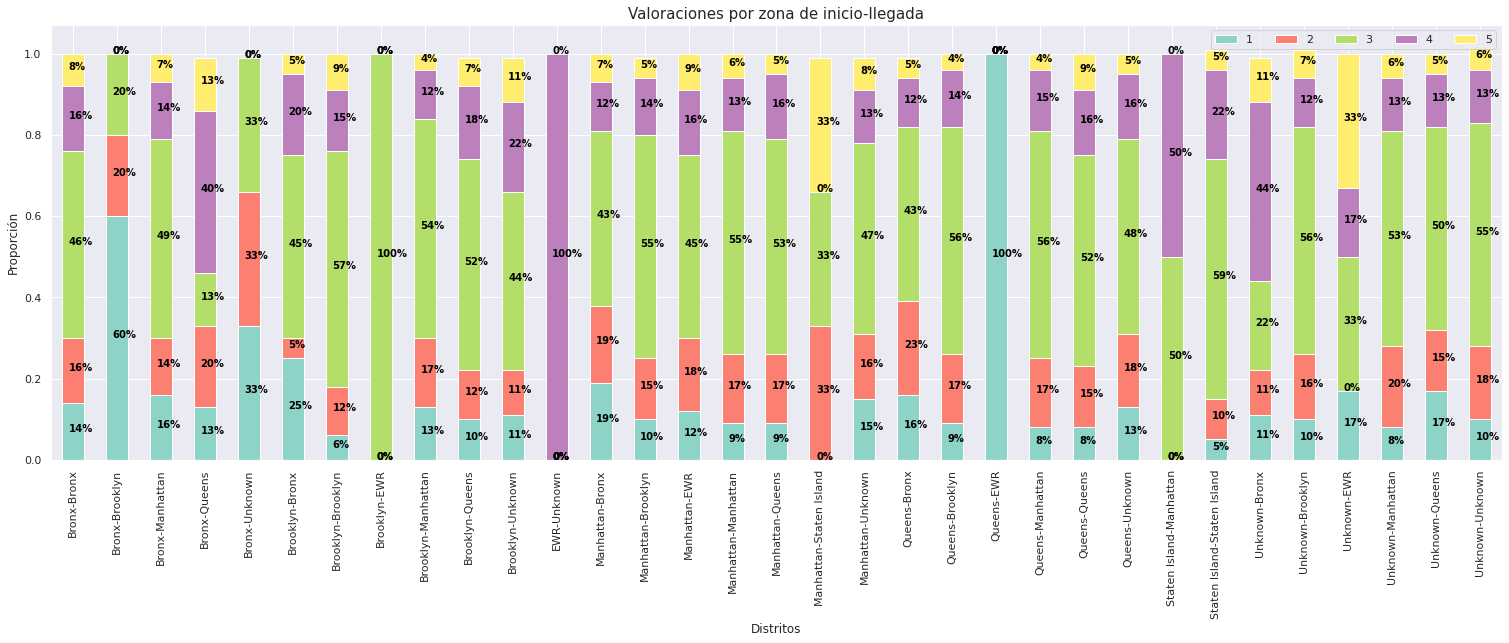

In [ ]:
# Plots on a stack type graph the combination of arrival and departure zones vs.
# departure zones vs. their ratio to the tip scale
cross_tab_prop_pu_do.plot(kind='bar',
                        stacked=True,
                        colormap='Set3',
                        figsize=(26, 8))

plt.legend(loc="upper right", ncol=5)
plt.xlabel("Distritos", fontdict={'fontsize':12})
plt.ylabel("Proporción", fontdict={'fontsize':12})
plt.title("Valoraciones por zona de inicio-llegada",fontdict={'fontsize':15})



for n, x in enumerate([*cross_tab_prop_pu_do.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop_pu_do.loc[x],
                                   cross_tab_prop_pu_do.loc[x].cumsum()):

        plt.text(x=n - 0.10,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{int(proportion * 100)}%',
                 color="black",
                 fontsize=10,
                 fontweight="bold")

plt.show()

In [ ]:
mascara_zonas = df['Borough_PU_DO'].isin(["Bronx-Bronx","Bronx-Brooklyn","Staten Island-Manhattan", "Unknown-EWR"])

df_zonas_combinacion = df[mascara_zonas]
df_zonas_combinacion.head(2)
df_zonas_combinacion.count()

tpep_pickup_datetime         198
tpep_dropoff_datetime        198
PULocationID                 198
Borough_PU                   198
Zone_PU                      193
DOLocationID                 198
Borough_DO                   198
Zone_DO                      198
passenger_count              198
trip_distance                198
fare_amount                  198
extra                        198
mta_tax                      198
tip_amount                   198
tolls_amount                 198
improvement_surcharge        198
total_amount                 198
total_sin_tip                198
tip_perc                     198
tip_score                    198
duration                     198
speed                        198
pickup_datetime              198
tempm                        198
conds                        198
icon                         198
fog                          198
rain                         198
snow                         198
hail                         198
thunder   

In [ ]:
data_pu_do_final = df_zonas_combinacion[['Borough_PU_DO', 'tip_score']]
data_pu_do_final.groupby('Borough_PU_DO').count()

,tip_score
Borough_PU_DO,
Bronx-Bronx,185
Bronx-Brooklyn,5
Staten Island-Manhattan,2
Unknown-EWR,6


In [ ]:
# Data frame of the ratio between combination and tip scale
cross_tab_prop_pu_do_final = pd.crosstab(index=data_pu_do_final['Borough_PU_DO'],
                             columns=data_pu_do_final['tip_score'],
                             normalize="index")
cross_tab_prop_pu_do_final = cross_tab_prop_pu_do_final.round(2)
cross_tab_prop_pu_do_final

tip_score,1,2,3,4,5
Borough_PU_DO,,,,,
Bronx-Bronx,0.14,0.16,0.46,0.16,0.08
Bronx-Brooklyn,0.60,0.20,0.20,0.00,0.00
Staten Island-Manhattan,0.00,0.00,0.50,0.50,0.00
Unknown-EWR,0.17,0.00,0.33,0.17,0.33


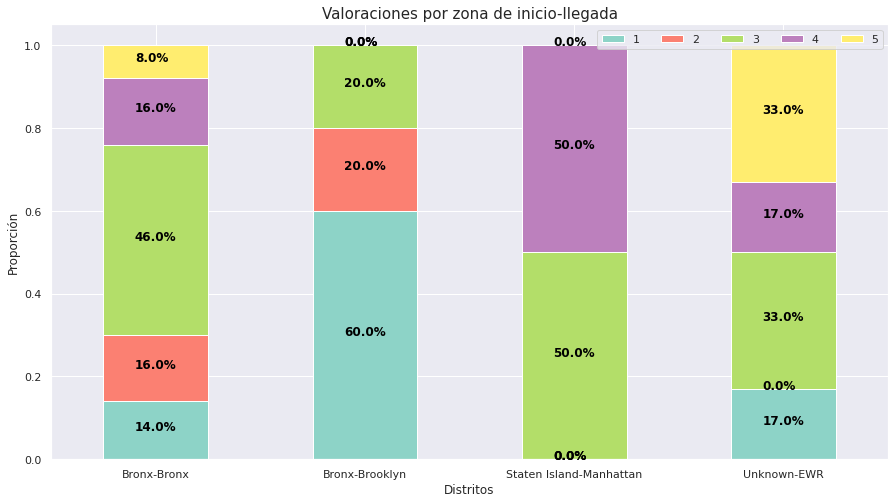

In [ ]:
# Plots on a stack type graph the combination of arrival and departure zones vs.
# departure zones vs. their ratio to the tip scale
cross_tab_prop_pu_do_final.plot(kind='bar',
                        stacked=True,
                        colormap='Set3',
                        figsize=(15, 8))

plt.legend(loc="upper right", ncol=5)
plt.xlabel("Distritos", fontdict={'fontsize':12})
plt.ylabel("Proporción", fontdict={'fontsize':12})
plt.title("Valoraciones por zona de inicio-llegada",fontdict={'fontsize':15})
plt.xticks(rotation = 0)

for n, x in enumerate([*cross_tab_prop_pu_do_final.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop_pu_do_final.loc[x],
                                   cross_tab_prop_pu_do_final.loc[x].cumsum()):

        plt.text(x=n - 0.10,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()


In [ ]:
trips_zone_and_tips = df.groupby(['Borough_PU','Borough_DO', 'tip_score'])['Borough_PU'].count().reset_index(name="quantity")
trips_zone_and_tips

,Borough_PU,Borough_DO,tip_score,quantity
0,Bronx,Bronx,1,26
1,Bronx,Bronx,2,30
2,Bronx,Bronx,3,86
3,Bronx,Bronx,4,29
4,Bronx,Bronx,5,14
...,...,...,...,...
138,Unknown,Unknown,1,1233
139,Unknown,Unknown,2,2258
140,Unknown,Unknown,3,7024
141,Unknown,Unknown,4,1612


In [ ]:
# Number of trips per dropp off zone
trips_drop_off = pd.DataFrame(df.Borough_DO.value_counts().reset_index().values, columns=["Zone", "Quantity"])
trips_drop_off_index = trips_drop_off.sort_index(axis = 0, ascending=True)
trips_drop_off_index

,Zone,Quantity
0,Manhattan,990682
1,Brooklyn,59624
2,Queens,51485
3,Unknown,14145
4,Bronx,4073
5,EWR,64
6,Staten Island,44


In [ ]:
# Percentage that each of the drop off zones represent of the total
trips_drop_off['Percentage'] = (trips_drop_off['Quantity'] / (df.shape[0]))*100
trips_drop_off

,Zone,Quantity,Percentage
0,Manhattan,990682,88.444511
1,Brooklyn,59624,5.323015
2,Queens,51485,4.596395
3,Unknown,14145,1.262815
4,Bronx,4073,0.363623
5,EWR,64,0.005714
6,Staten Island,44,0.003928
